In [24]:
import pandas as pd
import urllib
import missingno as msno
import sklearn


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn import datasets
from sklearn.linear_model import LassoCV

#sklearn.datasets.load_diabetes

IndentationError: unexpected indent (<ipython-input-24-9f8e20f2c740>, line 8)

In [2]:
df = pd.read_csv('raayngaancchamnwnphuutidechuue-covid-19-pracchamwan.csv')


In [3]:
df

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
0,1,1/12/2020,NaN,หญิง,61.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
1,2,1/17/2020,NaN,หญิง,74.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
2,3,1/22/2020,NaN,หญิง,73.0,Thailand,นครปฐม,นครปฐม,เมือง,คนต่างชาติเดินทางมาจากต่างประเทศ
3,4,1/22/2020,NaN,ชาย,68.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
4,5,1/24/2020,NaN,หญิง,66.0,China,นนทบุรี,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
...,...,...,...,...,...,...,...,...,...,...
13495,13496,1/24/2021,1/23/2021,หญิง,49.0,Thailand,สมุทรปราการ,กรุงเทพมหานคร,บางซื่อ,ระบุไม่ได้
13496,13497,1/24/2021,1/23/2021,ชาย,31.0,Thailand,สมุทรปราการ,กรุงเทพมหานคร,ลาดพร้าว,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
13497,13498,1/24/2021,1/23/2021,ชาย,45.0,Thailand,สมุทรปราการ,กรุงเทพมหานคร,ดินแดง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
13498,13499,1/24/2021,1/23/2021,หญิง,29.0,Thailand,สมุทรปราการ,กรุงเทพมหานคร,คันนายาว,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว


เเก้ไขชื่อ column ให้เป็นภาษาไทย

In [4]:
df.rename(columns = {'No.':'รหัสผู้ป่วย'},inplace = True)
df.rename(columns = {'announce_date':'วันที่แถลงข่าว'},inplace = True)
df.rename(columns = {'notification_date':'วันที่กระทรวงได้รับรายงาน'},inplace = True)
df.rename(columns = {'sex':'เพศผู้ป่วย'},inplace = True)
df.rename(columns = {'age':'อายุของผู้ป่วย'},inplace = True)
df.rename(columns = {'nationality':'สัญชาติ'},inplace = True)
df.rename(columns = {'province_of_isolation':'จังหวัดที่รักษาตัว'},inplace = True)
df.rename(columns = {'province_of_onset':'จังหวัดที่เริ่มพบว่าตัวเองมีอาการป่วย'},inplace = True)
df.rename(columns = {'district_of_onset':'อำเภอที่เริ่มพบว่าตัวเองมีอาการป่วย'},inplace = True)
df.rename(columns = {'risk':'ความเสี่ยง'},inplace = True)

In [5]:
df.rename(columns = {'รหัสผู้ป่วย':'No.'},inplace = True)
df.rename(columns = {'วันที่แถลงข่าว':'announce_date'},inplace = True)
df.rename(columns = {'วันที่กระทรวงได้รับรายงาน':'notification_date'},inplace = True)
df.rename(columns = {'เพศผู้ป่วย':'sex'},inplace = True)
df.rename(columns = {'อายุของผู้ป่วย':'age'},inplace = True)
df.rename(columns = {'สัญชาติ':'nationality'},inplace = True)
df.rename(columns = {'จังหวัดที่รักษาตัว':'province_of_isolation'},inplace = True)
df.rename(columns = {'จังหวัดที่เริ่มพบว่าตัวเองมีอาการป่วย':'province_of_onset'},inplace = True)
df.rename(columns = {'อำเภอที่เริ่มพบว่าตัวเองมีอาการป่วย':'district_of_onset'},inplace = True)
df.rename(columns = {'ความเสี่ยง':'risk'},inplace = True)

In [6]:
df

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
0,1,1/12/2020,NaN,หญิง,61.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
1,2,1/17/2020,NaN,หญิง,74.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
2,3,1/22/2020,NaN,หญิง,73.0,Thailand,นครปฐม,นครปฐม,เมือง,คนต่างชาติเดินทางมาจากต่างประเทศ
3,4,1/22/2020,NaN,ชาย,68.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
4,5,1/24/2020,NaN,หญิง,66.0,China,นนทบุรี,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
...,...,...,...,...,...,...,...,...,...,...
13495,13496,1/24/2021,1/23/2021,หญิง,49.0,Thailand,สมุทรปราการ,กรุงเทพมหานคร,บางซื่อ,ระบุไม่ได้
13496,13497,1/24/2021,1/23/2021,ชาย,31.0,Thailand,สมุทรปราการ,กรุงเทพมหานคร,ลาดพร้าว,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
13497,13498,1/24/2021,1/23/2021,ชาย,45.0,Thailand,สมุทรปราการ,กรุงเทพมหานคร,ดินแดง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
13498,13499,1/24/2021,1/23/2021,หญิง,29.0,Thailand,สมุทรปราการ,กรุงเทพมหานคร,คันนายาว,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว


In [7]:
df.columns

Index(['No.', 'announce_date', 'notification_date', 'sex', 'age',
       'nationality', 'province_of_isolation', 'province_of_onset',
       'district_of_onset', 'risk'],
      dtype='object')

ลบเเถวซ้ำ เเต่ไม่มี

In [8]:
df.drop_duplicates()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
0,1,1/12/2020,NaN,หญิง,61.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
1,2,1/17/2020,NaN,หญิง,74.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
2,3,1/22/2020,NaN,หญิง,73.0,Thailand,นครปฐม,นครปฐม,เมือง,คนต่างชาติเดินทางมาจากต่างประเทศ
3,4,1/22/2020,NaN,ชาย,68.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
4,5,1/24/2020,NaN,หญิง,66.0,China,นนทบุรี,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
...,...,...,...,...,...,...,...,...,...,...
13495,13496,1/24/2021,1/23/2021,หญิง,49.0,Thailand,สมุทรปราการ,กรุงเทพมหานคร,บางซื่อ,ระบุไม่ได้
13496,13497,1/24/2021,1/23/2021,ชาย,31.0,Thailand,สมุทรปราการ,กรุงเทพมหานคร,ลาดพร้าว,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
13497,13498,1/24/2021,1/23/2021,ชาย,45.0,Thailand,สมุทรปราการ,กรุงเทพมหานคร,ดินแดง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
13498,13499,1/24/2021,1/23/2021,หญิง,29.0,Thailand,สมุทรปราการ,กรุงเทพมหานคร,คันนายาว,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว


In [9]:
df.shape

(13500, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13500 entries, 0 to 13499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   No.                    13500 non-null  int64  
 1   announce_date          13500 non-null  object 
 2   notification_date      10705 non-null  object 
 3   sex                    10576 non-null  object 
 4   age                    9308 non-null   float64
 5   nationality            11897 non-null  object 
 6   province_of_isolation  13378 non-null  object 
 7   province_of_onset      11454 non-null  object 
 8   district_of_onset      9638 non-null   object 
 9   risk                   13149 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.0+ MB


missing data ?

In [11]:
df_missing = df.isnull()
df_missing_sum = df.isnull().sum()
df_missing_percent = df_missing.mean()*100

In [12]:
print('Total Missing Value:\n',df_missing_sum)
print('\n')
print('Percentage Missing Value:\n',df_missing_percent)

Total Missing Value:
 No.                         0
announce_date               0
notification_date        2795
sex                      2924
age                      4192
nationality              1603
province_of_isolation     122
province_of_onset        2046
district_of_onset        3862
risk                      351
dtype: int64


Percentage Missing Value:
 No.                       0.000000
announce_date             0.000000
notification_date        20.703704
sex                      21.659259
age                      31.051852
nationality              11.874074
province_of_isolation     0.903704
province_of_onset        15.155556
district_of_onset        28.607407
risk                      2.600000
dtype: float64


Python package ชื่อว่า misssingno แสดงปริมาณและความสัมพันธ์ของข้อมูลที่หายไปในรูปแบบของ barchart และ matrix ช่วยในการหาความสัมพันธ์ของการหายไปในข้อมูล

<AxesSubplot:>

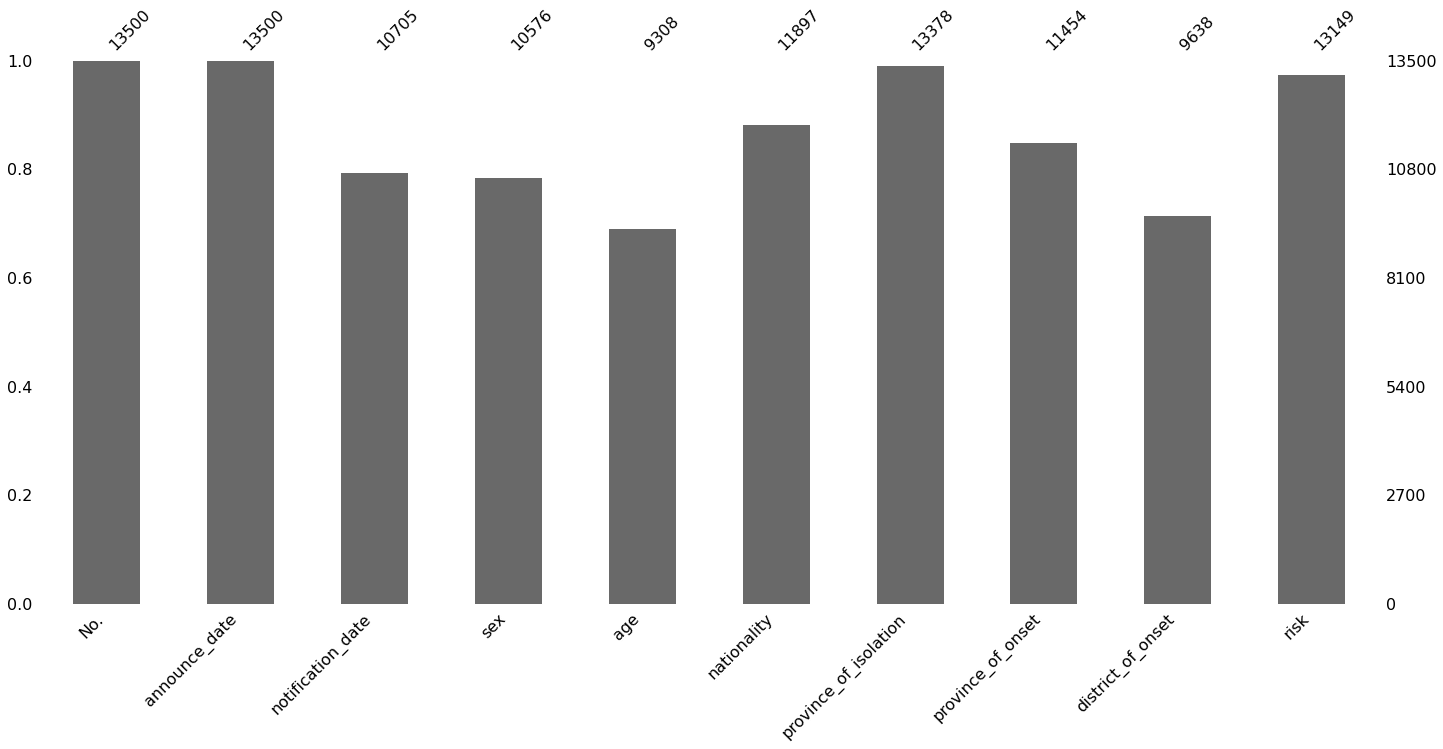

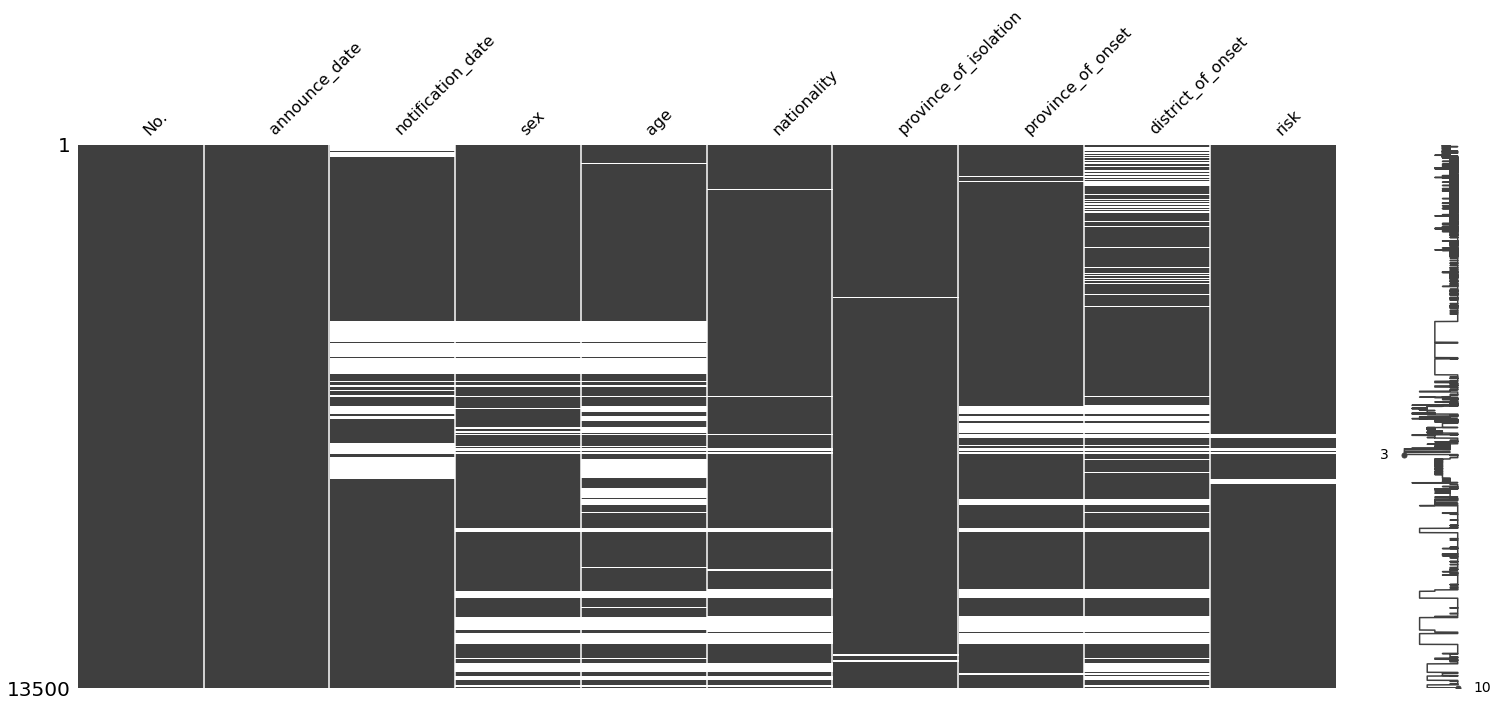

In [13]:
msno.bar(df)
msno.matrix(df)

province_of_isolation , risk
เป็นการหายของข้อมูลแบบ Missing Completely at Random(MCAR) (เหรอวะ) จากกราฟลักษณะการหายของข้อมูลไม่มีความสัมพันธ์กับตัวแปรอื่นๆเลย รวมถึงตัวมันเองด้วย ข้อมูลที่หาย หายไปแบบสุ่ม ไม่มีความสัมพันธ์กับตัวแปรใดๆในชุดข้อมูล

In [23]:
sorted1 = diabetes.sort_values('notification_date', ascending = True)
sorted2 = diabetes.sort_values('sex', ascending = True)
sorted3 = diabetes.sort_values('age', ascending = True)
sorted4 = diabetes.sort_values('nationality', ascending = True)
sorted5 = diabetes.sort_values('province_of_onset', ascending = True)
sorted6 = diabetes.sort_values('district_of_onset', ascending = True)


NameError: name 'diabetes' is not defined

In [15]:
msno.matrix(sorted1)
msno.matrix(sorted2)
msno.matrix(sorted3)
msno.matrix(sorted4)
msno.matrix(sorted5)
msno.matrix(sorted6)

NameError: name 'sorted1' is not defined